In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import seaborn as sns
# %matplotlib inline

In [127]:
df = pd.read_csv('train.csv')


In [128]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [129]:
df_2=df.groupby(['Store','Date'])['Weekly_Sales'].sum().reset_index()


In [195]:
df_2=df_2.groupby(['Date'])['Weekly_Sales'].mean().reset_index()
df_2

,Date,Weekly_Sales
0,2010-02-05,1.105572e+06
1,2010-02-12,1.074148e+06
2,2010-02-19,1.072822e+06
3,2010-02-26,9.770794e+05
4,2010-03-05,1.041588e+06
5,2010-03-12,1.020564e+06
6,2010-03-19,9.997550e+05
7,2010-03-26,9.807547e+05
8,2010-04-02,1.120530e+06
9,2010-04-09,1.052562e+06


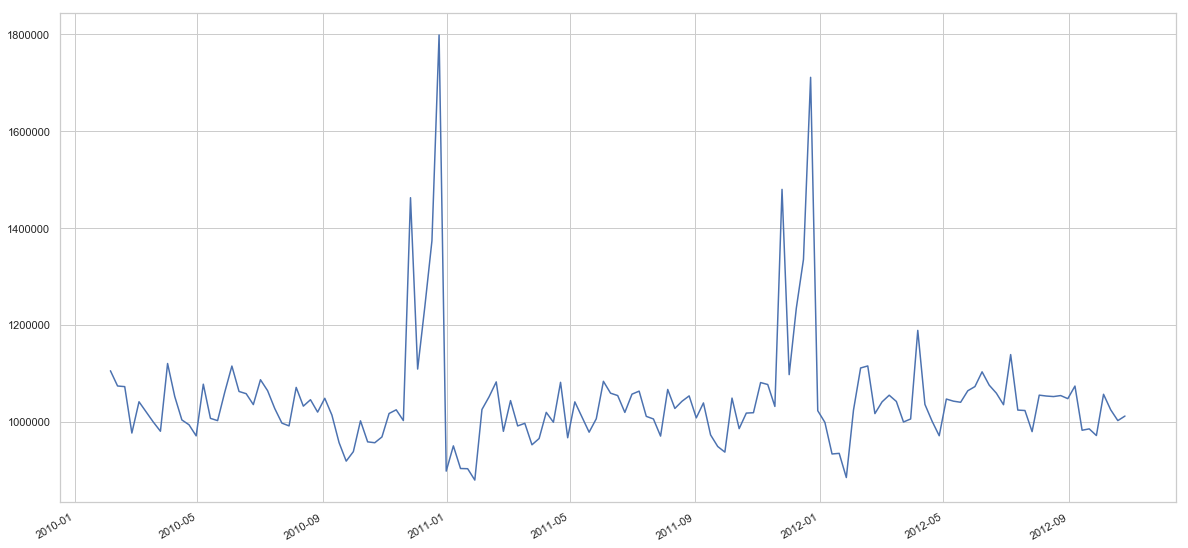

In [194]:
plt.figure(figsize=(20,10))
dates_x =dates.date2num(dates_format)
plt.plot_date(dates_x, df_2.Weekly_Sales,'-')
plt.gcf().autofmt_xdate()
plt.show()

In [176]:
ax.format_xdata = dates.DateFormatter('%Y-%m-%d')

ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()



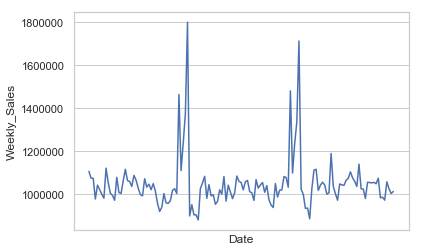

In [177]:
# plt.figure(figsize=(30,10))
plot_1=sns.lineplot(x='Date', y='Weekly_Sales',data=df_2);
# plot_1.set_xticklabels(labels = plot_1.get_xticklabels(),
#                        rotation = 90,
#                        horizontalalignment='right',
#                        fontweight='light',
#                        fontsize='x-large');

# plt.xticks(rotation=45);
# type(plot_1.axes.xaxis)
plot_1.axes.xaxis.set_major_locator(dates.MonthLocator())

In [178]:
plot_1.get_xticklabels()[0]

IndexError: list index out of range

In [147]:
plt.show()